
##### 2. A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors. 
- Perform the analysis, which requires some study on the background of oil palm tree physiology.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
palm = pd.read_csv('palm_ffb.csv')

In [3]:
palm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [4]:
palm.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [5]:
palm.shape

(130, 9)

In [6]:
palm.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


Observations:
- No Nulls
- Apperantly no outliers except in 'Precipitation' - but can be seasonal impact 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn

In [8]:
palm.columns

Index(['Date', 'SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield'],
      dtype='object')

<AxesSubplot:>

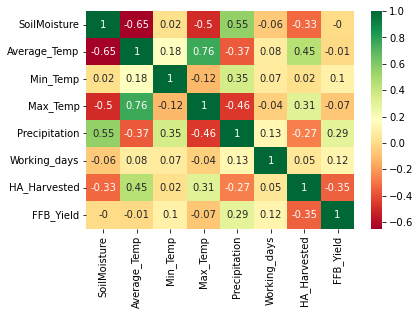

In [9]:
#plotting the heatmap for correlation
sns.heatmap(round(palm.corr(),2), annot=True,cmap='RdYlGn')

Obervation: From the correlation Matrix 
- HA_Harvested is having negative impact on FFB_Yield
- Precipitation is having postive impact on FFB_Yield

In [10]:
#!pip install statsmodels

In [11]:
import statsmodels.api as sm
import pandas as pd

In [12]:
x = palm.drop(columns=['Date','FFB_Yield'])
y = palm['FFB_Yield']

In [13]:
# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              FFB_Yield   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     5.935
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           5.92e-06
Time:                        22:01:44   Log-Likelihood:               -0.23443
No. Observations:                 130   AIC:                             16.47
Df Residuals:                     122   BIC:                             39.41
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7331      1.520      1.798

c:\Users\tkonathala\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The above OLS report is inline with preliminary correlation analysis 
- Not all external factors are impacting the FFB Yield - except SoilMoisture, Precipitation, HA_Harvested  